<a href="https://colab.research.google.com/github/Yasir323/lazy-import/blob/main/Lazy_Import_and_Pyforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
SEED = 42

## Lets look for some appropriate datasets first

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [2]:
import seaborn as sns

In [4]:
reg_data = sns.load_dataset('anscombe')
reg_data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


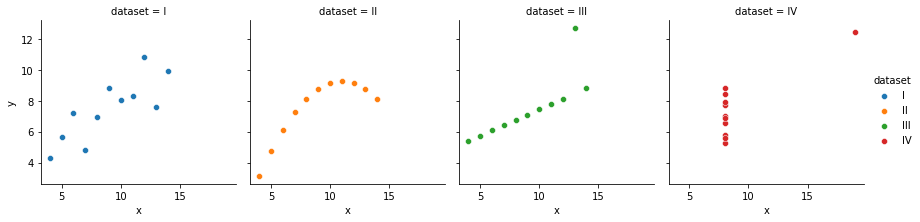

In [5]:
# Lets plot the data first
g = sns.FacetGrid(reg_data, col="dataset", hue="dataset")
g.map_dataframe(sns.scatterplot, x="x", y="y")
g.set_axis_labels("x", "y")
g.add_legend()

In [6]:
# Lets pick a dataset for classification as well
clas_data = sns.load_dataset('titanic')
clas_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Importing everything with just one line

In [7]:
!pip install pyforest

In [8]:
import pyforest as pf

In [9]:
# Lets check what has actually been imported for us
pf.lazy_imports()

['import gensim',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import pickle',
 'import keras',
 'from pyspark import SparkContext',
 'import dash',
 'import plotly as py',
 'import sklearn',
 'import sys',
 'from sklearn.ensemble import RandomForestClassifier',
 'import spacy',
 'import re',
 'import os',
 'import altair as alt',
 'from openpyxl import load_workbook',
 'import datetime as dt',
 'from dask import dataframe as dd',
 'import lightgbm as lgb',
 'from sklearn.ensemble import RandomForestRegressor',
 'import tqdm',
 'from sklearn.preprocessing import OneHotEncoder',
 'import pandas as pd',
 'import matplotlib.pyplot as plt',
 'import plotly.graph_objs as go',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import numpy as np',
 'import pydot',
 'import statistics',
 'import tensorflow as tf',
 'import nltk',
 'import plotly.express as px',
 'import awswrangler as wr',
 'import matplotlib as mpl',
 'import glob',
 'import bokeh',
 'from skl

Although its quite wasteful to import so many libraries, most of which we'll not even use. But its good to know that we can do this and `pyforest` is actually importing these libraries using the most commonly used aliases which is a good feature to have.

# Classification Problem

In [10]:
clas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [12]:
# Train test val split
train, validate, test = np.split(
     clas_data.sample(frac=1, random_state=SEED),
     [int(.7*len(clas_data)), int(.85*len(clas_data))]
)

<IPython.core.display.Javascript object>

In [13]:
train.shape[0], validate.shape[0], test.shape[0]

(623, 134, 134)

In [14]:
y_train = train.survived
X_train = train.drop('survived', axis=1)
y_train.shape

(623,)

In [15]:
y_val = validate.survived
X_val = validate.drop('survived', axis=1)

In [16]:
y_test = test.survived
X_test = test.drop('survived', axis=1)

We might wanna do some feature engineering if we are to compare all the models because some don't work well with missing values, some with categorical variables and so on...

In [21]:
dfs = [X_train, X_val, X_test]
df_names = ['Training set', 'Validation set', 'Test set']

## Missing values

In [28]:
def display_missing(df):    
    for col in df.columns.tolist():
        print('{}: {}'.format(col, df[col].isnull().sum()))
    print()

In [29]:
print('Missing Values')
print('-'*50)
for df, df_name in zip(dfs, df_names):
    print('{}'.format(df_name))
    display_missing(df)

Missing Values
--------------------------------------------------
Training set
pclass: 0
sex: 0
age: 129
sibsp: 0
parch: 0
fare: 0
embarked: 2
class: 0
who: 0
adult_male: 0
deck: 487
embark_town: 2
alive: 0
alone: 0

Validation set
pclass: 0
sex: 0
age: 25
sibsp: 0
parch: 0
fare: 0
embarked: 0
class: 0
who: 0
adult_male: 0
deck: 104
embark_town: 0
alive: 0
alone: 0

Test set
pclass: 0
sex: 0
age: 23
sibsp: 0
parch: 0
fare: 0
embarked: 0
class: 0
who: 0
adult_male: 0
deck: 97
embark_town: 0
alive: 0
alone: 0

